1. Normalize 

2. Get CDF (Cumulative Distribution Function)  

3. Uniform

In [1]:
import numpy as np
from sympy import symbols
import math
import cmath 

import matplotlib as mpl
from matplotlib import pyplot as plt 

from scipy.stats import norm
import seaborn as sb 

import lmfit as lf
import scipy.optimize as opt 

from scipy.optimize import curve_fit  

from scipy import special

## Normalization 
function has an integral of one  
we will need to integrate gaussians 
1. define normalize gaussian functions 

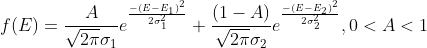

### Defining the Normalized Gaussian Function

In [2]:
#defining pi 
print(math.pi) 

#defining e 
print(math.e)

3.141592653589793
2.718281828459045


In [3]:
def normalized(E_range,A,E1,o1,E2,o2): 
    return (A/math.sqrt(2*math.pi)*o1)*(math.e**(-((E_range-E1)**2)/(2*(o1)**2)))+((1-A)/(math.sqrt(2*math.pi)*o2))*(math.e**(-((E_range-E2)**2)/(2*(o2)**2)))


### Values

In [4]:
E_range = np.linspace(0, 20, 1000)

A=.7

E1= 10 
o1= 1

E2= 4
o2= 1 

print(normalized(E_range,A,E1,o1,E2,o2))

[4.01490677e-05 4.34877331e-05 4.70851553e-05 5.09597373e-05
 5.51310529e-05 5.96199116e-05 6.44484242e-05 6.96400722e-05
 7.52197796e-05 8.12139875e-05 8.76507319e-05 9.45597234e-05
 1.01972431e-04 1.09922169e-04 1.18444183e-04 1.27575748e-04
 1.37356254e-04 1.47827316e-04 1.59032863e-04 1.71019250e-04
 1.83835361e-04 1.97532719e-04 2.12165598e-04 2.27791137e-04
 2.44469461e-04 2.62263795e-04 2.81240590e-04 3.01469649e-04
 3.23024248e-04 3.45981269e-04 3.70421328e-04 3.96428908e-04
 4.24092490e-04 4.53504689e-04 4.84762388e-04 5.17966872e-04
 5.53223968e-04 5.90644174e-04 6.30342798e-04 6.72440095e-04
 7.17061393e-04 7.64337231e-04 8.14403484e-04 8.67401493e-04
 9.23478188e-04 9.82786208e-04 1.04548402e-03 1.11173602e-03
 1.18171267e-03 1.25559055e-03 1.33355251e-03 1.41578771e-03
 1.50249173e-03 1.59386662e-03 1.69012098e-03 1.79147003e-03
 1.89813560e-03 2.01034622e-03 2.12833709e-03 2.25235013e-03
 2.38263396e-03 2.51944387e-03 2.66304178e-03 2.81369623e-03
 2.97168225e-03 3.137281

### Plotting Normalized Graph 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


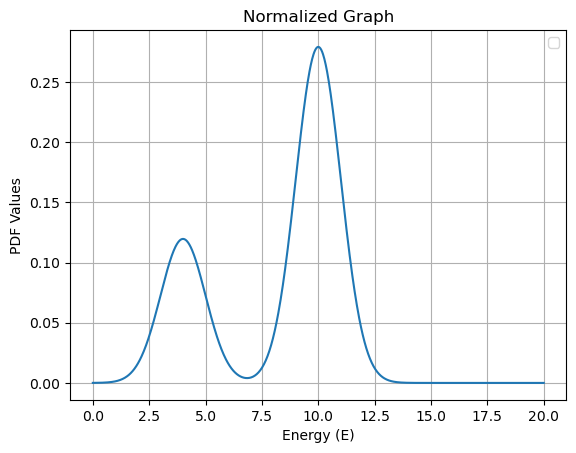

In [5]:
plt.plot(E_range, normalized(E_range,A,E1,o1,E2,o2))
plt.xlabel('Energy (E)')
plt.ylabel('PDF Values')
plt.title('Normalized Graph')
plt.legend()
plt.grid(True)
plt.show()

## Getting CDF

In [6]:
from scipy.integrate import quad_vec

In [7]:
#def CDF(E_range,A,E1,o1,E2,o2): 
    #return quad_vec(normalized,np.zeros(np.shape(E_range)),E_range,args=(A,E1,o1,E2,o2))[0]

In [8]:
# Define CDF as a loop

In [9]:
def CDF(E_range,A,E1,o1,E2,o2): 
    integrals = np.zeros(np.shape(E_range))
    for i,E in enumerate(E_range): 
      integrals[i] = quad_vec(normalized,0,E,args=(A,E1,o1,E2,o2))[0]
    
    return integrals

In [10]:
print(CDF([5],.7,10,1,4,1)) 
#Integral from 0 to 5

[0.25239412]


In [11]:
print(CDF([20],.7,10,1,4,1)) 
#Integral from 0 to 20 
#If PDF is correct, the integral should equal one. This represents the probability of any value. 
#Listed as: integral, uncertainty

[0.9999905]


In [12]:
print(CDF(np.asarray([5,20]),.7,10,1,4,1))

[0.25239412 0.9999905 ]


### Plotting CDF

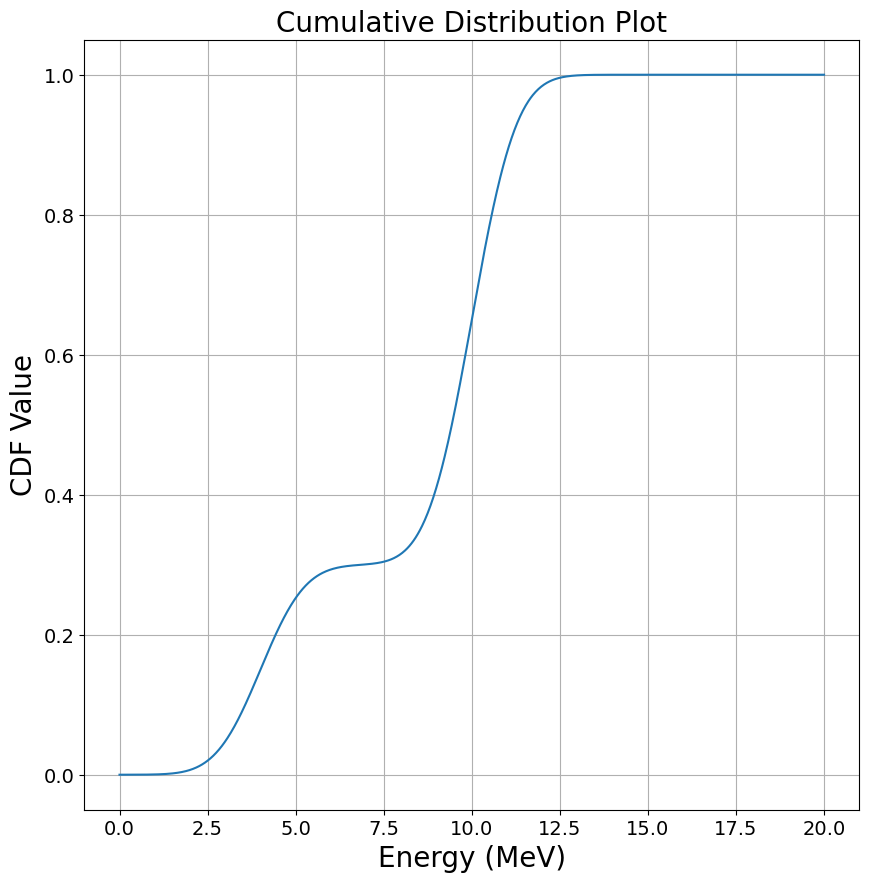

In [32]:
plt.figure(figsize=(10, 10))

plt.plot(E_range,CDF(E_range,A,E1,o1,E2,o2))  

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Energy (MeV)',fontsize=20)
plt.ylabel('CDF Value',fontsize=20)
plt.title('Cumulative Distribution Plot',fontsize=20)

plt.grid(True) 

#plt.savefig('2FPlot1.png')
plt.show()

## Uniform distribution

### Uniform distribution from 0 to 1

In [14]:
U=np.random.uniform(0,1,10000) 
#print(U)

In [15]:
#Inverse of CDF 
#xp is E_range 
#fp is CDF(E_range,A,E1,o1…) 

def ICDF(x,A,E1,o1,E2,o2):
    return np.interp(x, CDF(E_range,A,E1,o1,E2,o2),E_range) 

In [16]:
E_vals=(ICDF(U,A,E1,o1,E2,o2)) 
#print(E_vals)

### Plotting the Inverse of CDF as a Histogram

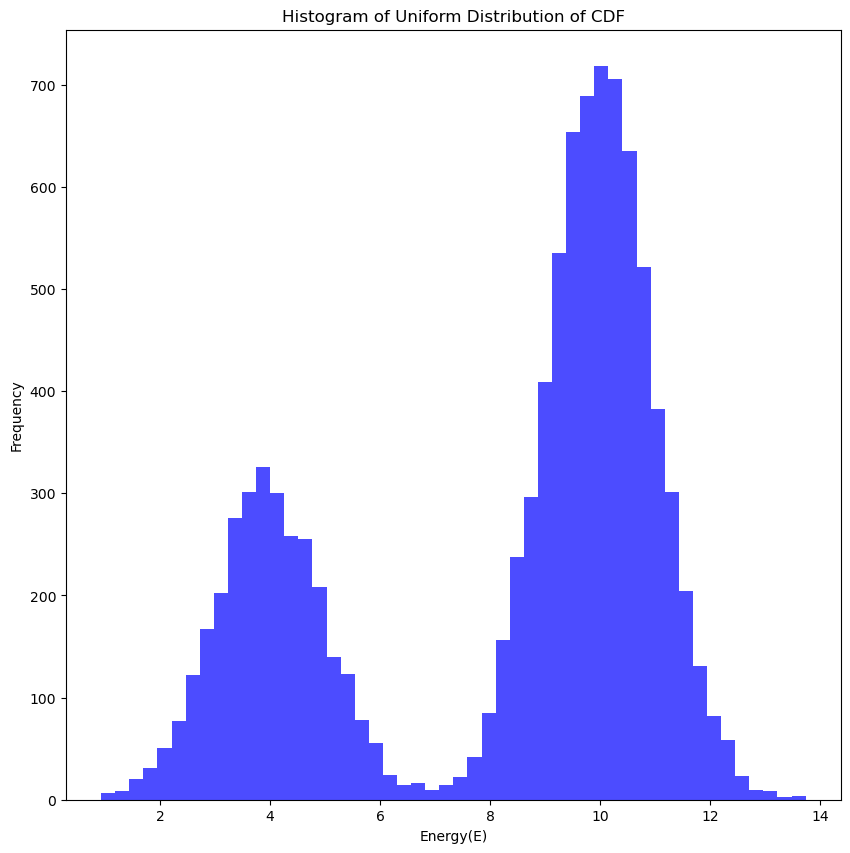

In [17]:
fig,axes = plt.subplots(1,1,figsize=(10.0,10.0),sharex=True)
plt.hist(E_vals,50, color='blue',alpha=0.7) 
plt.title('Histogram of Uniform Distribution of CDF')
plt.xlabel('Energy(E)')
plt.ylabel('Frequency')
plt.show()